In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

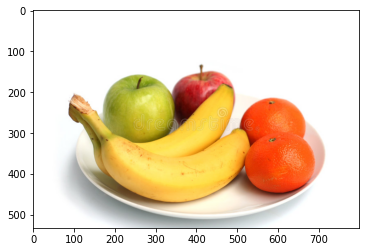

In [2]:
image = plt.imread('/content/drive/MyDrive/Colab Notebooks/Codes_GitHub/plate-fruit-1640254.jpg')
plt.imshow(image)
plt.show()

Color component in different color spaces - RGB, LUV, YUV

In [3]:
img = np.copy(image)
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

img2 = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
L1 = img2[:,:,0]
U1 = img2[:,:,1]
V1 = img2[:,:,2]

img3 = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
Y = img3[:,:,0]
U = img3[:,:,1]
V = img3[:,:,2]

RGB, LUV and YUV color space images

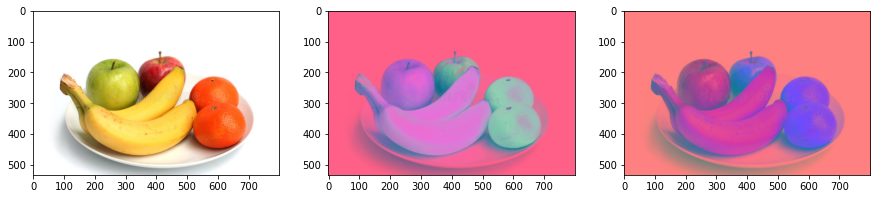

In [4]:
plt.subplots(figsize=(15,15))
plt.subplot(131)
plt.imshow(img)

plt.subplot(132)
plt.imshow(img2)

plt.subplot(133)
plt.imshow(img3)
plt.show()

Components of each color space

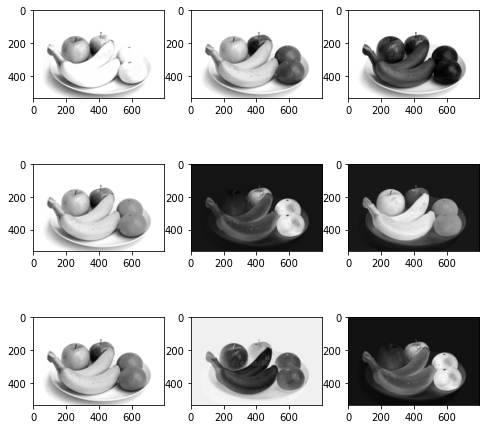

In [5]:
list_ = [R, G, B, L1, U1, V1, Y, U, V]


axes = []
f = plt.figure(figsize=(8, 8))
for i in range((len(list_))):
  axes.append(f.add_subplot(3,3,i+1))
  plt.imshow(list_[i], cmap='gray')

plt.show()

Tangerine segmentation

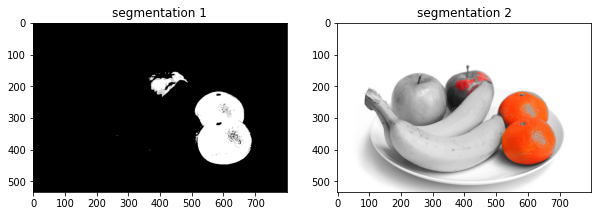

In [6]:
im = np.zeros((image.shape[0], image.shape[1],3)).astype('uint8')
V[V>210] = 255
V[V<200] = 0

for i in range(image.shape[0]):
  for j in range(image.shape[1]):

    im[i,j,0] = Y[i,j]  #0
    im[i,j,1] = Y[i,j]  #0
    im[i,j,2] = Y[i,j]  #0

    if V[i,j]==255:
      im[i,j,0] = image[i,j,0]
      im[i,j,1] = image[i,j,1]
      im[i,j,2] = image[i,j,2]

      
plt.subplots(figsize=(10,10))
plt.subplot(121)
plt.imshow(V, cmap='gray')
plt.title('segmentation 1')

plt.subplot(122)
plt.imshow(im)
plt.title('segmentation 2')
plt.show()

Banana segmentation

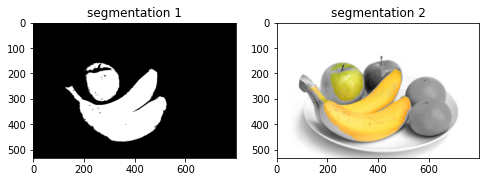

In [7]:
im = np.zeros((image.shape[0], image.shape[1],3)).astype('uint8')
V1[V1>200] = 255
V1[V1<200] = 0

for i in range(image.shape[0]):
  for j in range(image.shape[1]):

    im[i,j,0] = L1[i,j]
    im[i,j,1] = L1[i,j]
    im[i,j,2] = L1[i,j]

    if V1[i,j]>200:
      im[i,j,0] = image[i,j,0]
      im[i,j,1] = image[i,j,1]
      im[i,j,2] = image[i,j,2]

plt.subplots(figsize=(8,8))
plt.subplot(121)
plt.imshow(V1, cmap='gray')
plt.title('segmentation 1')

plt.subplot(122)
plt.imshow(im)
plt.title('segmentation 2')
plt.show()

Segmentation

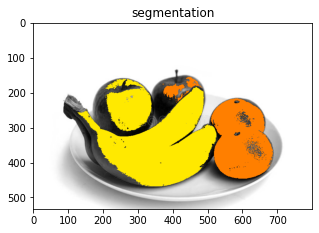

In [8]:
im = np.zeros((image.shape[0], image.shape[1],3)).astype('uint8')

V[V>210] = 255
V[V<200] = 0

V1[V1>200] = 255
V1[V1<200] = 0

for i in range(image.shape[0]):
  for j in range(image.shape[1]):

    im[i,j,0] = B[i,j]
    im[i,j,1] = B[i,j]
    im[i,j,2] = B[i,j]

    if V[i,j]==255:
      im[i,j,0] = 255
      im[i,j,1] = 127
      im[i,j,2] = 0

    elif V1[i,j]==255:
      im[i,j,0] = 255
      im[i,j,1] = 233
      im[i,j,2] = 0

plt.subplots(figsize=(5,5))
plt.imshow(im)
plt.title('segmentation')
plt.show()